# K means clustering

Clustering is used for classification. Here we are going to work with simulated data. We are going to simulate a set of people; children, women and men. We will assume that children are small, in height and weight, women slightly larger and men larger again. We will simulate data with 20% children, 45% women and 35% men. We will assume that weight is correlated to height.

In [1]:
import numpy
children, women, men = 20, 45, 35
sample = children + women + men

height_children = numpy.random.normal(120, 15, children) / 100
weight_children = 21.5 * height_children * numpy.random.normal(1.0, 0.05, children)

height_women = numpy.random.normal(170, 5, women) / 100
weight_women = 40.0 * height_women * numpy.random.normal(1.0, 0.1, women)

height_men = numpy.random.normal(180, 5, men) / 100
weight_men = 50.0 * height_men * numpy.random.normal(1.0, 0.1, men)

Lets plot the data so that we may compare to our later results in classifying our data.

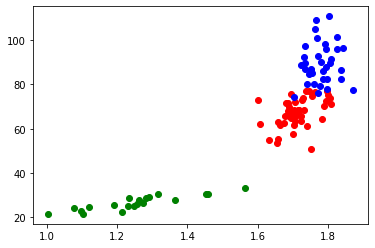

In [2]:
import matplotlib.pyplot as plt
plt.plot(height_children, weight_children, 'go')
plt.plot(height_women, weight_women, 'ro')
plt.plot(height_men, weight_men, 'bo')
plt.show()

Now we place all data into one large array. Thereby we loose all knowledge og categories, though we still know from the order of the points, we can use that fact later for testing. We move on to normalize the data for use in the distance function. 

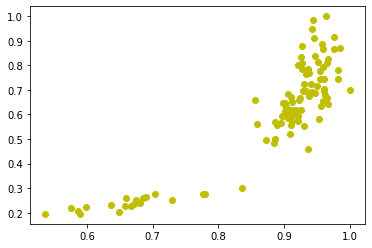

In [3]:
raw_data = numpy.concatenate((numpy.array((height_children, weight_children)), \
                          numpy.array((height_women, weight_women)) , \
                          numpy.array((height_men, weight_men))), axis = 1)

data = raw_data / numpy.max(raw_data, axis = 1)[numpy.newaxis].T #We transpose to have the data in rows
plt.plot(data[0, :], data[1, :], 'yo')
plt.show()

Now we can start trying to find the clusters. We start out by picking 3 random points and build clusters around those. This will often look good, even though we are only building random clusters.

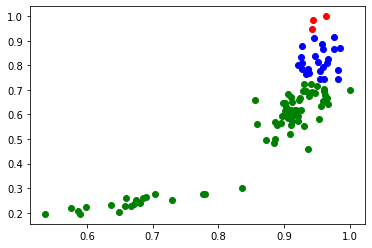

In [4]:
def all_dist(observation, data):
    return numpy.sqrt((data[0, :] - observation[0])**2 + (data[1, :] - observation[1])**2)

k=3
centroids = numpy.array([data[:, numpy.random.randint(sample)] for _ in range(k)])
distances = numpy.empty((k,sample))
for d in range(k):
    distances[d, :] = all_dist(centroids[d], data)
winners = numpy.argmin(distances, axis = 0)
clusters = [data[:, winners == i] for i in range(k)]
for cluster, color in zip(clusters, ['go', 'ro', 'bo']):
    plt.plot(cluster[0, :], cluster[1, :], color)
plt.show()

Obviously we need to itterate to make the clusters better. We do this by recalculating the center of a cluster to be the mean of the points insie the cluster for each itteration. Once the cluster centers do not change we have converged.

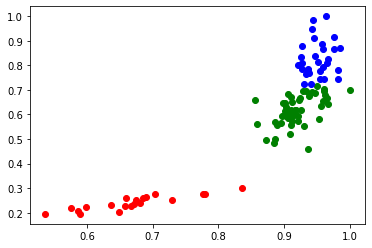

In [5]:
def cluster(data, k):
    centroids = numpy.array([data[:, numpy.random.randint(sample)] for _ in range(k)])
    done = False
    while not done:
        distances = numpy.empty((k,sample))
        for d in range(k):
            distances[d, :] = all_dist(centroids[d], data)
        winners = numpy.argmin(distances, axis = 0)
        clusters = [data[:, winners == i] for i in range(k)]
        prev_centroids = centroids
        centroids = numpy.array([numpy.average(cluster, axis = 1) for cluster in clusters])
        if numpy.sum(prev_centroids-centroids) == 0:
            done=True
    for cluster, color in zip(clusters, ['go', 'ro', 'bo']):
        plt.plot(cluster[0, :], cluster[1, :], color)
    plt.show()

cluster(data,3)

# Excersises
1. Increase the sample size and see how that affects the algorithm.
2. Try and add on obvious outlier; a 1m 100kg person for instance, and see what happens